In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [45]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as dates
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import matplotlib.ticker as plticker

In [3]:
df = pd.read_csv("applemobilitytrends-2020-05-02.csv")

In [4]:
df.head()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
0,country/region,Albania,driving,NaN,100.0,95.30,101.43,97.20,103.55,112.67,...,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36
1,country/region,Albania,walking,NaN,100.0,100.68,98.93,98.46,100.85,100.13,...,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28
2,country/region,Argentina,driving,NaN,100.0,97.07,102.45,111.21,118.45,124.01,...,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23
3,country/region,Argentina,walking,NaN,100.0,95.11,101.37,112.67,116.72,114.14,...,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61
4,country/region,Australia,driving,NaN,100.0,102.98,104.21,108.63,109.08,89.00,...,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67


In [8]:
df["geo_type"].unique()

array(['country/region', 'city', 'sub-region'], dtype=object)

In [48]:
df[(df["geo_type"] == "city") & (df["region"] == "Saint Petersburg - Russia")]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
475,city,Saint Petersburg - Russia,driving,Санкт-Петербург (Россия),100.0,101.26,105.51,108.20,109.88,108.99,...,56.04,55.74,47.88,48.25,57.04,58.40,59.66,70.43,56.88,53.99
476,city,Saint Petersburg - Russia,walking,Санкт-Петербург (Россия),100.0,103.53,97.82,97.67,118.10,120.06,...,38.12,35.98,34.45,32.75,36.94,37.65,36.64,42.66,38.44,42.32


In [51]:
df[(df["geo_type"] == "city") & (df["region"] == "S - Russia")]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
486,city,San Francisco - Bay Area,driving,NaN,100.0,104.21,106.18,106.36,122.64,113.41,...,45.68,52.35,48.69,39.91,44.63,46.78,46.90,49.10,56.59,52.03
487,city,San Francisco - Bay Area,transit,NaN,100.0,101.59,104.05,97.69,115.19,108.10,...,20.31,21.32,15.44,17.05,19.17,21.23,21.39,21.31,22.40,16.75
488,city,San Francisco - Bay Area,walking,NaN,100.0,106.46,98.83,74.53,99.76,119.78,...,29.00,33.09,33.26,27.06,27.72,30.07,28.37,29.65,34.55,34.72


In [56]:
df[(df["geo_type"] == "country/region") & (df["region"] == "Russia")]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
107,country/region,Russia,driving,Россия,100.0,101.13,102.0,103.86,111.20,107.34,...,61.54,64.28,58.11,58.50,64.88,67.19,70.31,77.78,67.56,63.76
108,country/region,Russia,walking,Россия,100.0,103.91,102.6,105.07,114.14,112.00,...,48.95,50.71,46.90,46.99,50.97,52.59,54.12,58.16,54.03,52.86


In [57]:
df[(df["geo_type"] == "country/region") & (df["region"] == "Ukraine")]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
142,country/region,Ukraine,driving,Україна,100.0,104.63,110.48,106.39,111.80,95.55,...,76.66,77.47,65.65,68.41,75.48,82.54,86.13,92.47,79.3,73.36
143,country/region,Ukraine,walking,Україна,100.0,100.93,107.14,99.31,104.36,90.34,...,56.18,58.27,48.15,45.76,56.84,59.83,63.34,59.13,58.6,52.03


In [59]:
df[(df["geo_type"] == "country/region") & (df["region"] == "United States")]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02
146,country/region,United States,driving,US,100.0,102.97,105.19,108.48,125.51,115.04,...,68.00,76.68,72.62,57.06,68.77,71.33,71.86,74.98,88.50,84.34
147,country/region,United States,transit,US,100.0,97.77,98.84,99.04,108.03,97.41,...,25.08,25.99,24.85,22.47,26.64,27.32,26.84,26.66,29.24,28.11
148,country/region,United States,walking,US,100.0,99.59,101.87,100.60,121.36,132.38,...,52.92,58.89,60.00,45.95,54.93,57.61,56.67,57.81,69.58,71.29


In [25]:
filterrd = df.filter(regex='2020-.*')

In [26]:
filterrd.loc[475, :]

2020-01-13    100.00
2020-01-14    101.26
2020-01-15    105.51
2020-01-16    108.20
2020-01-17    109.88
               ...  
2020-04-28     58.40
2020-04-29     59.66
2020-04-30     70.43
2020-05-01     56.88
2020-05-02     53.99
Name: 475, Length: 111, dtype: float64

[]

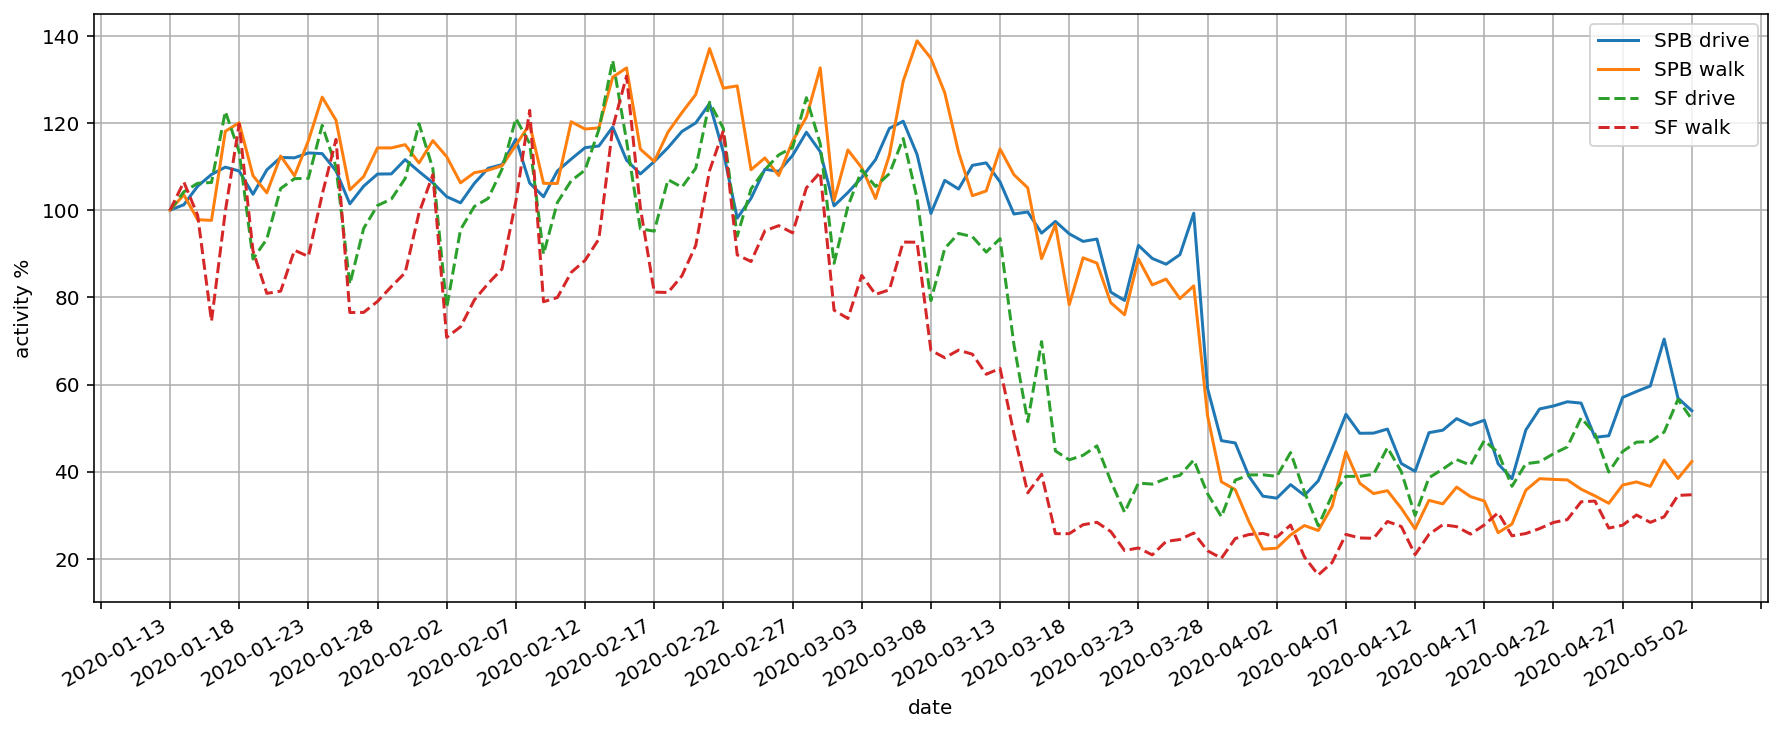

In [55]:
plt.rcParams['figure.figsize'] = [15, 6]


fig, ax = plt.subplots()  #  Create a figure containing a single axes.
ax.plot(filterrd.loc[475, :], "-", markersize=1, label="SPB drive") 
ax.plot(filterrd.loc[476, :], "-", markersize=1, label="SPB walk") 
ax.plot(filterrd.loc[486, :], "--", markersize=1, label="SF drive") 
ax.plot(filterrd.loc[488, :], "--", markersize=1, label="SF walk") 

fig.autofmt_xdate()
ax.set_xlabel('date')
ax.set_ylabel('activity %')
ax.grid(True)

## Set time format and the interval of ticks (every 15 minutes)
# xformatter = dates.DateFormatter('%m/%d')
# xlocator = dates.HourLocator(interval=1)



loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.legend()

plt.plot()

[]

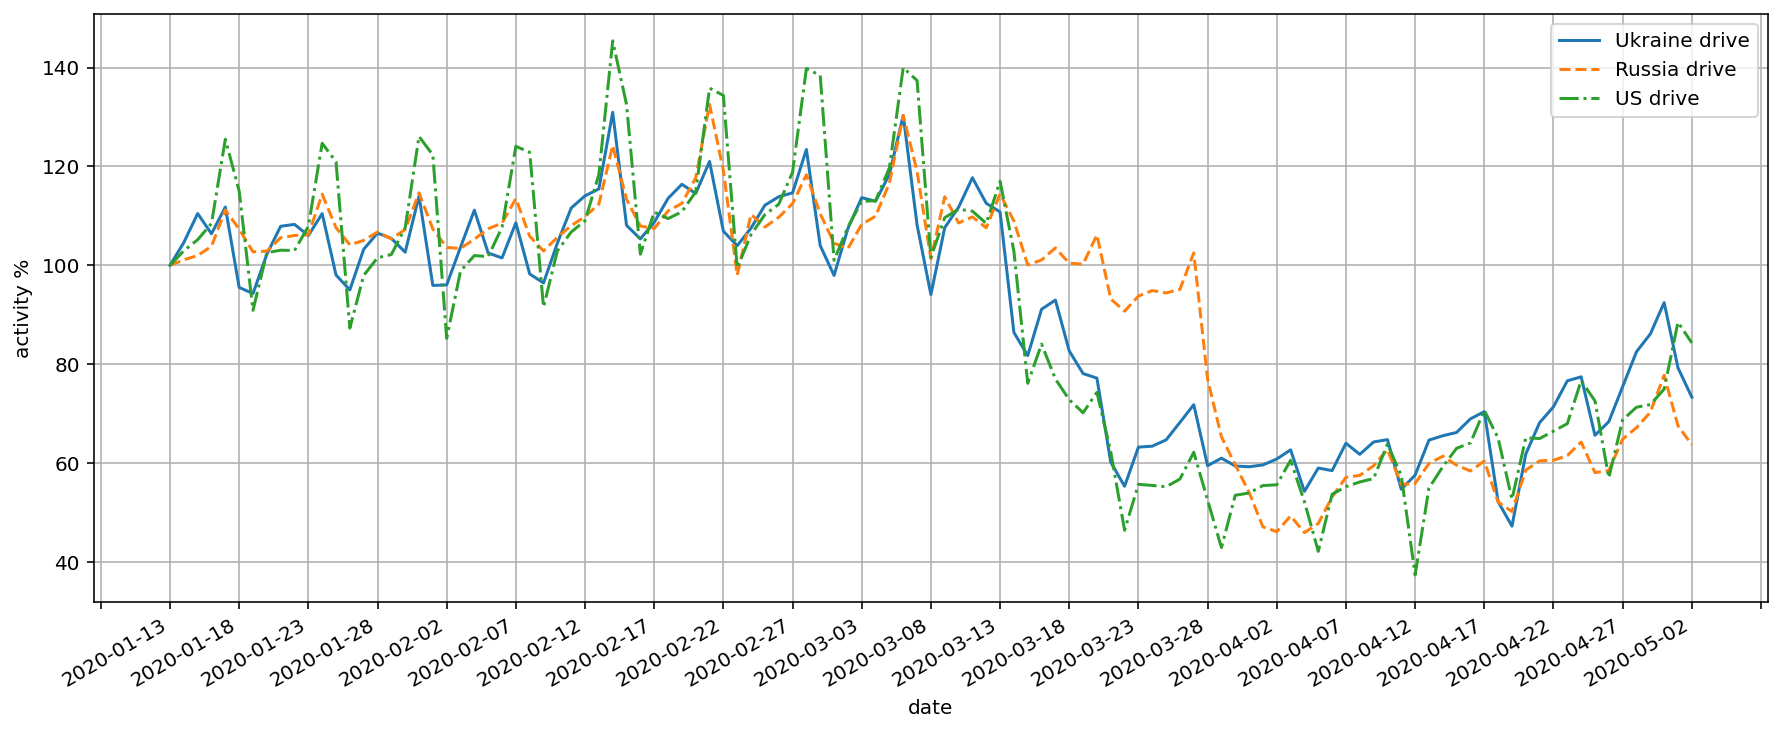

In [61]:
plt.rcParams['figure.figsize'] = [15, 6]


fig, ax = plt.subplots()  #  Create a figure containing a single axes.
ax.plot(filterrd.loc[142, :], "-", markersize=1, label="Ukraine drive") 
ax.plot(filterrd.loc[107, :], "--", markersize=1, label="Russia drive") 
ax.plot(filterrd.loc[146, :], "-.", markersize=1, label="US drive") 


fig.autofmt_xdate()
ax.set_xlabel('date')
ax.set_ylabel('activity %')
ax.grid(True)

## Set time format and the interval of ticks (every 15 minutes)
# xformatter = dates.DateFormatter('%m/%d')
# xlocator = dates.HourLocator(interval=1)



loc = plticker.MultipleLocator(base=5.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.legend()

plt.plot()